# Tolerancing - Compensators

In [1]:
import numpy as np

from optiland import optic
from optiland.tolerancing.core import Tolerancing
from optiland.tolerancing.monte_carlo import MonteCarlo
from optiland.tolerancing.perturbation import DistributionSampler

In [ ]:
class Singlet(optic.Optic):
    def __init__(self):
        super().__init__()

        # add surfaces
        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(
            index=1,
            thickness=7,
            radius=19.93,
            is_stop=True,
            material="N-SF11",
        )
        self.add_surface(index=2, thickness=17.0695)
        self.add_surface(index=3)

        # add aperture
        self.set_aperture(aperture_type="EPD", value=25.4)

        # add field
        self.set_field_type(field_type="angle")
        self.add_field(y=0)
        self.add_field(y=10)
        self.add_field(y=14)

        # add wavelength
        self.add_wavelength(value=0.48613270)
        self.add_wavelength(value=0.58756180, is_primary=True)
        self.add_wavelength(value=0.65627250)

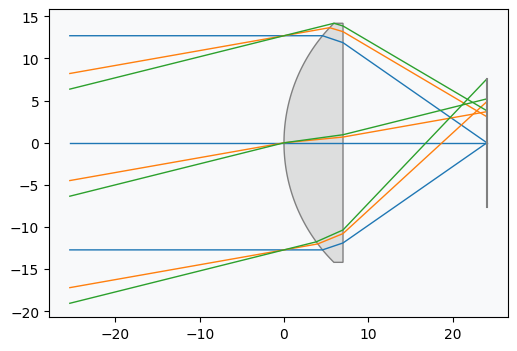

In [3]:
optic = Singlet()
optic.draw()

In [4]:
tolerancing = Tolerancing(optic)

Define perturbations:

In [5]:
for k in range(1, 3):
    # X-tilt
    sampler = DistributionSampler("normal", loc=0, scale=0.01)
    tolerancing.add_perturbation("tilt", sampler, surface_number=k, axis="x")

    # Y-tilt
    sampler = DistributionSampler("normal", loc=0, scale=0.01)
    tolerancing.add_perturbation("tilt", sampler, surface_number=k, axis="y")

    # X-decenter
    sampler = DistributionSampler("normal", loc=0, scale=0.1)
    tolerancing.add_perturbation("decenter", sampler, surface_number=k, axis="x")

    # Y-decenter
    sampler = DistributionSampler("normal", loc=0, scale=0.1)
    tolerancing.add_perturbation("decenter", sampler, surface_number=k, axis="y")

Define operands:

In [ ]:
input_data = {
    "optic": optic,
    "surface_number": -1,
    "Hx": 0,
    "Hy": 0.0,
    "wavelength": 0.55,
    "num_rays": 5,
}
tolerancing.add_operand("rms_spot_size", input_data, target=0)

Run Monte Carlo without compensator:

In [7]:
monte_carlo = MonteCarlo(tolerancing)
monte_carlo.run(num_iterations=100)

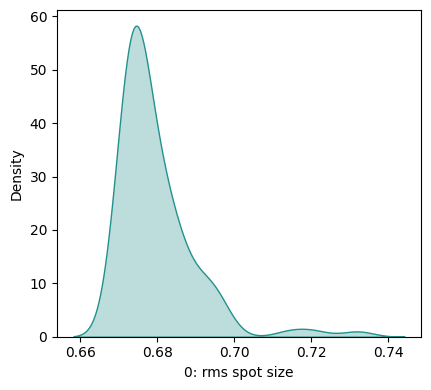

In [8]:
monte_carlo.view_histogram(kde=True)

Add compensator:

In [ ]:
# distance from last surface to image plane
tolerancing.add_compensator("thickness", surface_number=2)

Rerun Monte Carlo with compensator:

In [10]:
monte_carlo = MonteCarlo(tolerancing)
monte_carlo.run(num_iterations=100)

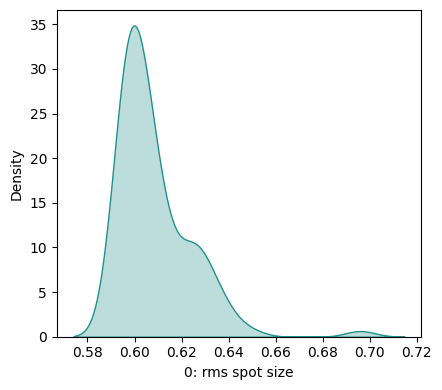

In [11]:
monte_carlo.view_histogram(kde=True)

By comparing the distributions, we can see that adding compensator generally improved the RMS spot size. The histogram with the compensator shows a distribution with slightly smaller values, indicating that the compensator effectively reduced the impact of the perturbations on the RMS spot size.